In [2]:
import fiona
import geopandas as gpd
import os
import pandas as pd

In [3]:
# List available layers in the geopackage file
layers = fiona.listlayers('../app/data/INSPIRE_AU.gpkg')
print("Available layers:", layers)

Available layers: ['AdministrativeBoundary', 'AdministrativeUnit']


In [79]:
admin_units = gpd.read_file('../app/data/INSPIRE_AU.gpkg', layer='AdministrativeBoundary').to_crs(epsg=4326)

In [80]:
admin_units_metadata = gpd.read_file('../app/data/INSPIRE_AU.gpkg', layer='AdministrativeUnit').to_crs(epsg=4326)

In [81]:
admin_units_metadata[['nationalLevelName', 'administeredBy', 'name']].nationalLevelName.unique()

array(['okres', 'obec', 'štát', 'kraj'], dtype=object)

In [82]:
ba_admin_unit = admin_units_metadata[(admin_units_metadata.nationalLevelName == 'kraj') & (admin_units_metadata.name == 'Bratislavský')]

In [118]:
ba1_admin_unit = admin_units_metadata[(admin_units_metadata.nationalLevelName == 'okres') &  (admin_units_metadata.name == 'Bratislava I')]

<Axes: >

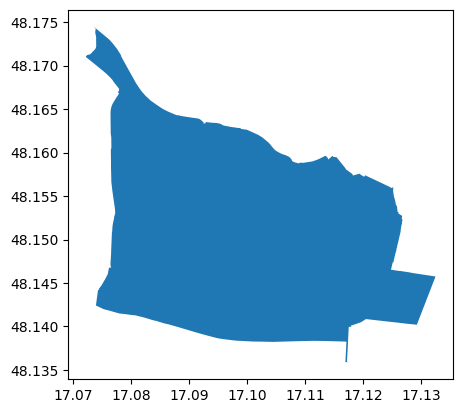

In [75]:
ba1_admin_unit.plot()

In [76]:
ba_admin_unit.to_file('../app/data/processed/ba_admin_unit.geojson', driver='GeoJSON')

In [77]:
ba1_admin_unit.to_file('../app/data/processed/ba1_admin_unit.geojson', driver='GeoJSON')

In [15]:
# List available layers in the geopackage file
tn_layers = fiona.listlayers('../app/data/INSPIRE_TN.gpkg')
print("Available layers:", layers)

Available layers: ['RailwayElectrification', 'RailwayLink', 'RailwayYardArea', 'NumberOfTracks', 'RoadLink', 'RoadArea', 'AerodromeType', 'RoadServiceArea', 'VerticalPosition', 'NominalTrackGauge', 'RoadWidth', 'SurfaceComposition', 'FunctionalRoadClass', 'CablewayLink', 'RunwayArea', 'FormOfWay', 'RoadServiceType', 'RailwayArea', 'RoadSurfaceCategory', 'AerodromeArea', 'ConditionOfFacility', 'Road', 'RailwayType', 'RailwayStationArea']


In [16]:
tn_layers_dict = {}

In [33]:
for layer in tn_layers:
    tn_layers_dict[layer] = gpd.read_file('../app/data/INSPIRE_TN.gpkg', layer=layer).to_crs(epsg=4326)

/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in column endLifespanVersion: 0000-00-00T00:00:00Z
  return ogr_read(
/home/aneta/Documents/Projects/future-roots/venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Invalid content for record 1 in co

In [113]:
tn_geometries = []

In [114]:
for name, layer in tn_layers_dict.items():
    if 'geometry' in layer.columns:
        layer['layerName'] = name
        tn_geometries.append(layer[['layerName', 'geometry']])

In [115]:
tn_geometries = pd.concat(tn_geometries)

In [116]:
tn_geometries = tn_geometries[~pd.isnull(tn_geometries.geometry)]

In [117]:
tn_geometries.to_file('../app/data/processed/tn_geometries.geojson', driver='GeoJSON')

In [119]:
tn_geometries.reset_index(inplace=True)
ba1_admin_unit.reset_index(inplace=True)

In [126]:
tn_geometries_ba1 = gpd.sjoin(ba1_admin_unit[['geometry']], tn_geometries[['geometry']], how='left')

/tmp/ipykernel_34914/3850698801.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  tn_geometries_ba1 = gpd.sjoin(ba1_admin_unit[['geometry']], tn_geometries[['geometry']].unary_union, how='left')


KeyboardInterrupt: 

In [125]:
tn_geometries_ba1.plot()

,geometry,index_right
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",879961
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",879728
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",75788
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",54689
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",77233
...,...,...
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",3418
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",3417
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",221559
0,"POLYGON ((17.07353 48.17447, 17.07354 48.17447...",221557


In [ ]:
tn_geometries_ba1

In [9]:
df = gpd.read_file('../data/geojsons/ba_trees.geojson')

In [10]:
df.head()

,index,geometry
0,0,POINT (17.04364 48.18031)
1,1,POINT (17.04365 48.1803)
2,2,POINT (17.04367 48.18029)
3,3,POINT (17.04369 48.18029)
4,4,POINT (17.04022 48.18841)


In [11]:
df = df.rename({'index': 'TYP_ID'}, axis=1)

In [12]:
df.to_file('../data/geojsons/ba_trees.geojson', driver="GeoJSON")

<Axes: >

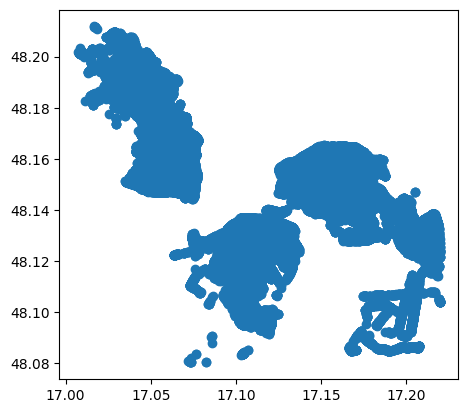

In [13]:
df.plot()